In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['font.family'] = 'Yu Mincho'

In [36]:
df = pd.read_csv('covid-19-pref-area-20200403.csv', skiprows=7, header=0)

print(df.shape)
print(df.info())
display(df.head())

(47, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pref        47 non-null     object 
 1   Pop(100k)   47 non-null     float64
 2   Infected    47 non-null     int64  
 3   Discharged  47 non-null     int64  
 4   PCR         47 non-null     int64  
 5   Area        47 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.3+ KB
None


,Pref,Pop(100k),Infected,Discharged,PCR,Area
0,Hokkaido,53.2,190,130,2803,Hokkaido
1,Aomori,12.8,11,0,249,Tohoku
2,Iwate,12.6,0,0,69,Tohoku
3,Miyagi,23.2,13,1,479,Tohoku
4,Akita,10.0,9,2,358,Tohoku


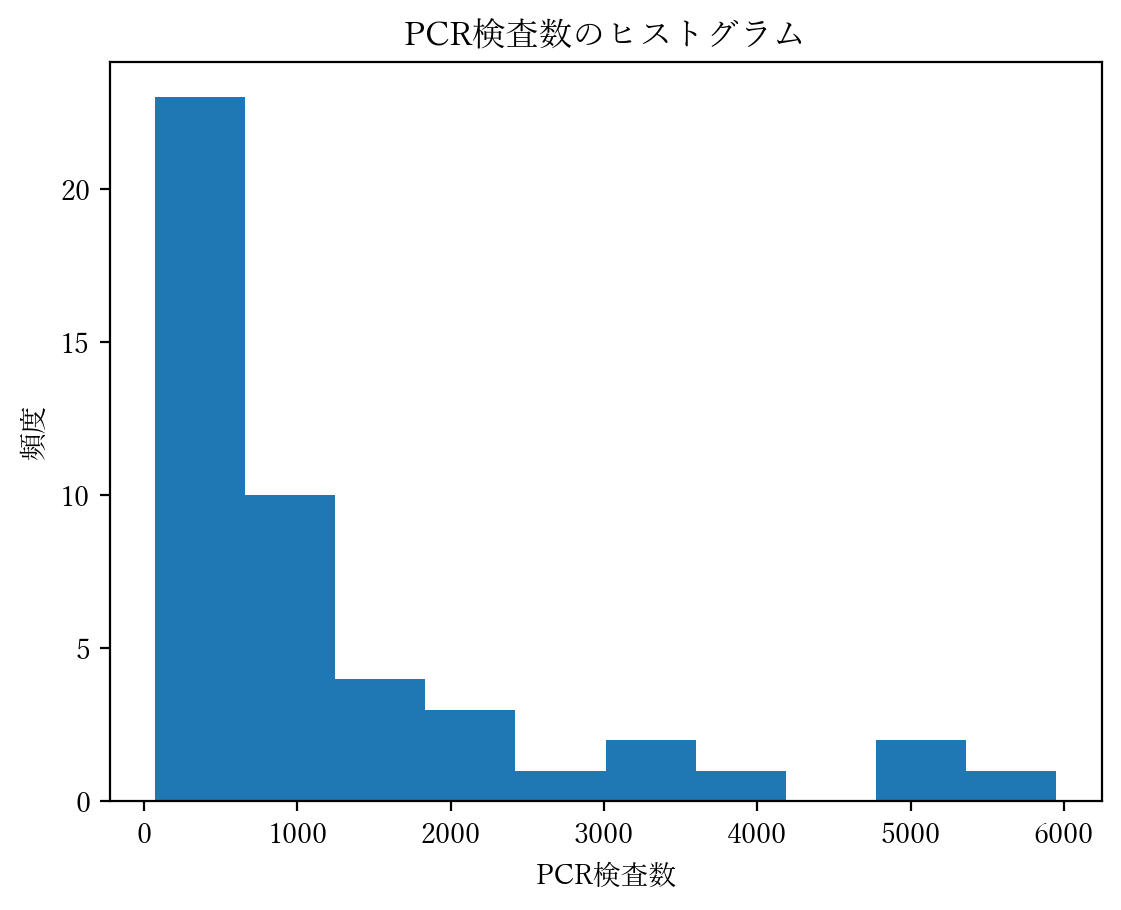

In [37]:
plt.hist(df['PCR'], bins=10)
plt.xlabel('PCR検査数')
plt.ylabel('頻度')
plt.title('PCR検査数のヒストグラム')
plt.show()

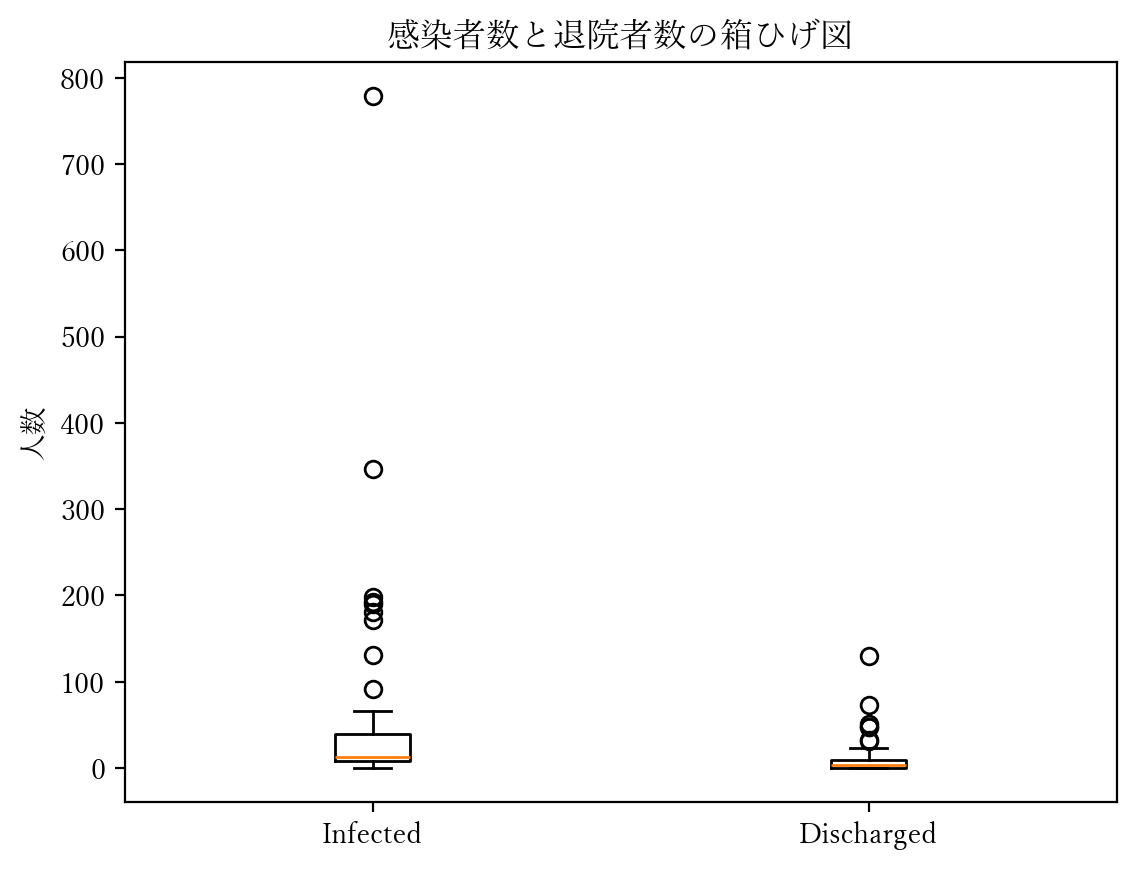

In [38]:
plt.boxplot([df['Infected'], df['Discharged']], labels=['Infected', 'Discharged'])
plt.title('感染者数と退院者数の箱ひげ図')
plt.ylabel('人数')
plt.show()

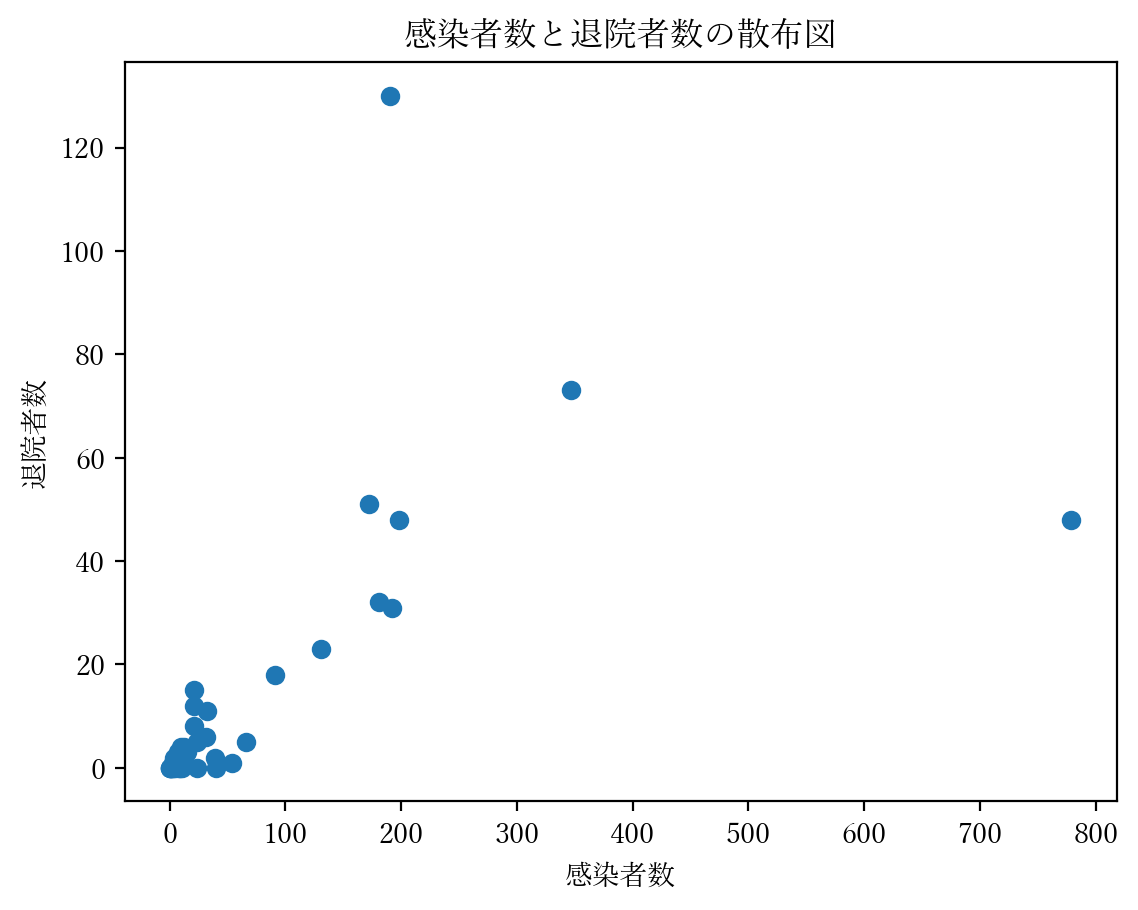

In [39]:
plt.scatter(df['Infected'], df['Discharged'], marker='o')
plt.xlabel('感染者数')
plt.ylabel('退院者数')
plt.title('感染者数と退院者数の散布図')
plt.show()

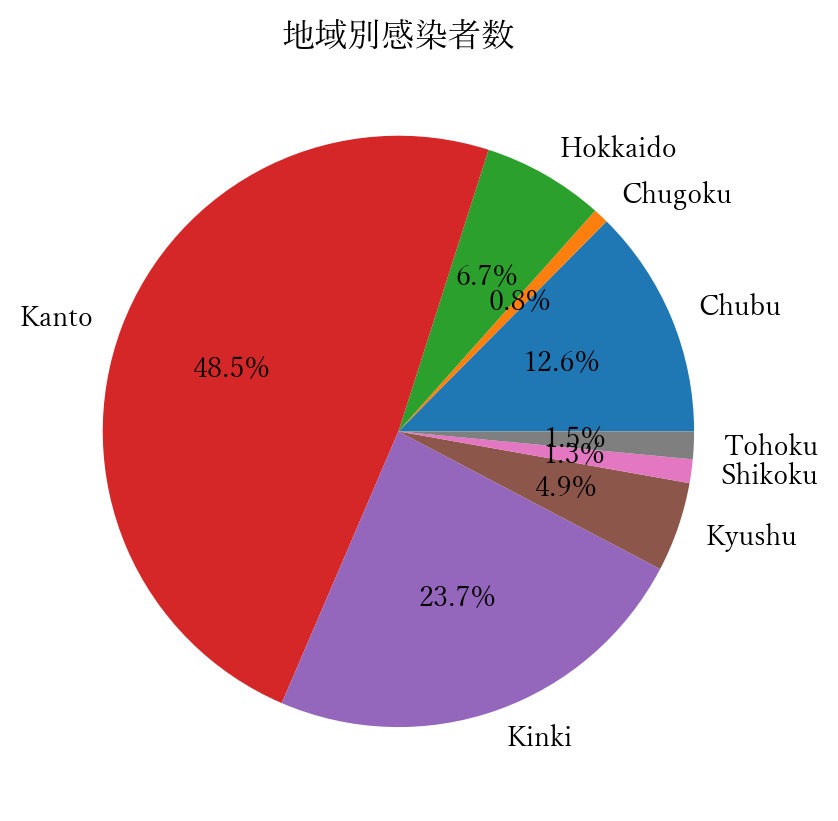

In [40]:
area_infected = df.groupby('Area')['Infected'].sum()
plt.pie(area_infected, autopct="%.1f%%", labels=area_infected.index)
plt.title('地域別感染者数')
plt.show()

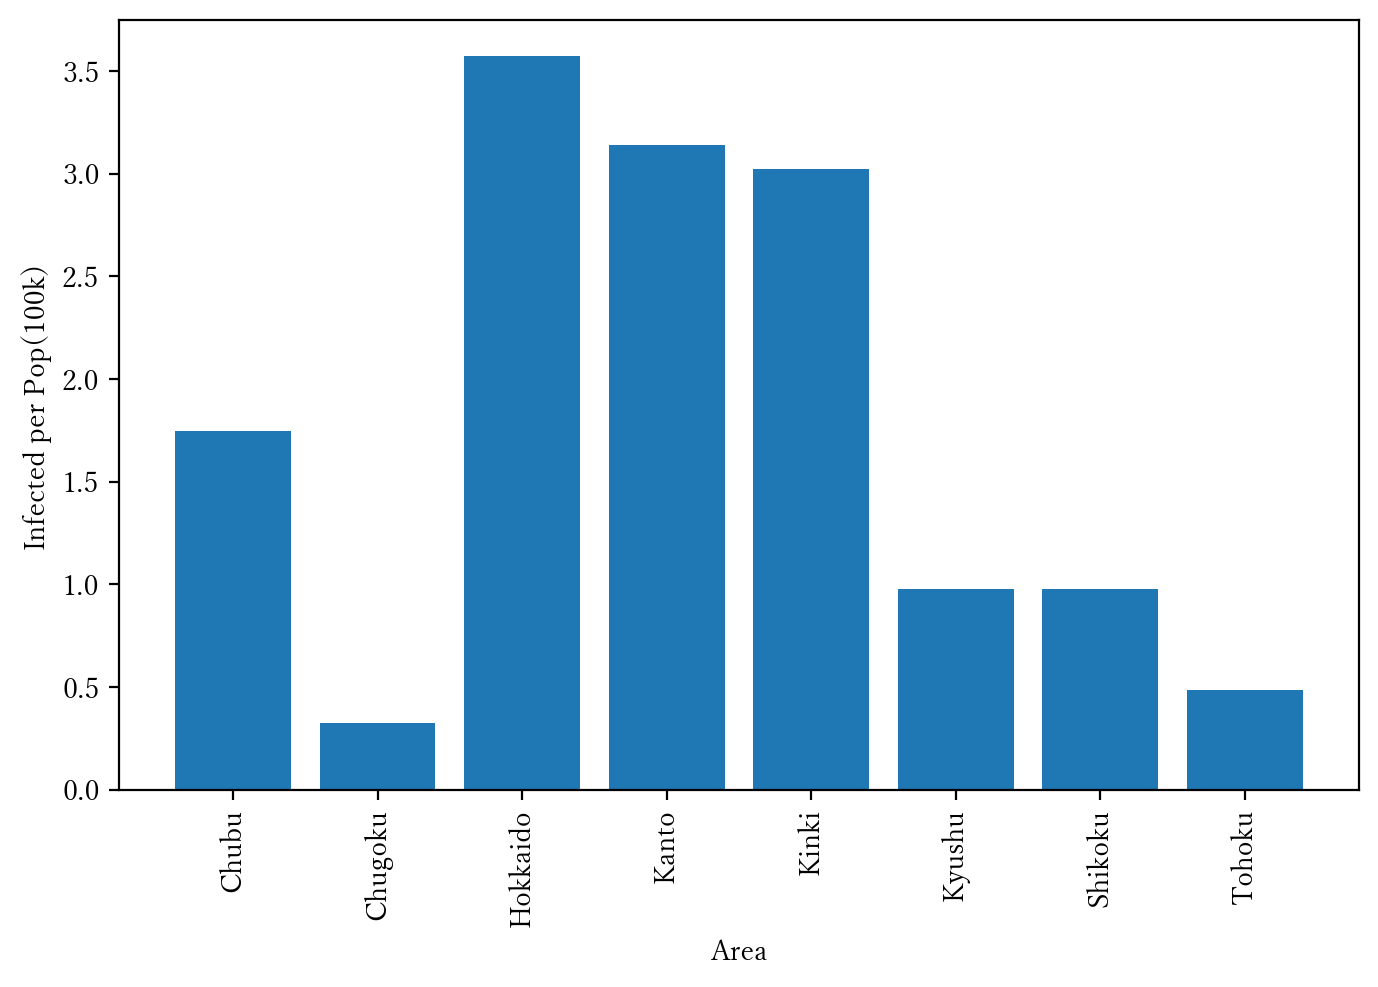

In [41]:
df_area = df.groupby('Area').agg({'Infected': 'sum', 'Pop(100k)': 'sum'})
df_area['Infected_rate'] = df_area['Infected'] / df_area['Pop(100k)']

plt.figure(figsize=(8, 5))
plt.bar(df_area.index, df_area['Infected_rate'])
plt.xlabel('Area')
plt.ylabel('Infected per Pop(100k)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_jpn = pd.read_csv('covid-19-japan-20200407.csv')

print(df_jpn.shape)
print(df_jpn.info())
display(df_jpn.head())

(57, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          57 non-null     object
 1   Infected_day  57 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
None


,Date,Infected_day
0,2020-02-06,16
1,2020-02-07,0
2,2020-02-10,0
3,2020-02-12,0
4,2020-02-13,1


In [43]:
df_jpn['Date'] = pd.to_datetime(df_jpn['Date'], format='%Y-%m-%d')
print(df_jpn.info())
display(df_jpn.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          57 non-null     datetime64[ns]
 1   Infected_day  57 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.0 KB
None


,Date,Infected_day
0,2020-02-06,16
1,2020-02-07,0
2,2020-02-10,0
3,2020-02-12,0
4,2020-02-13,1


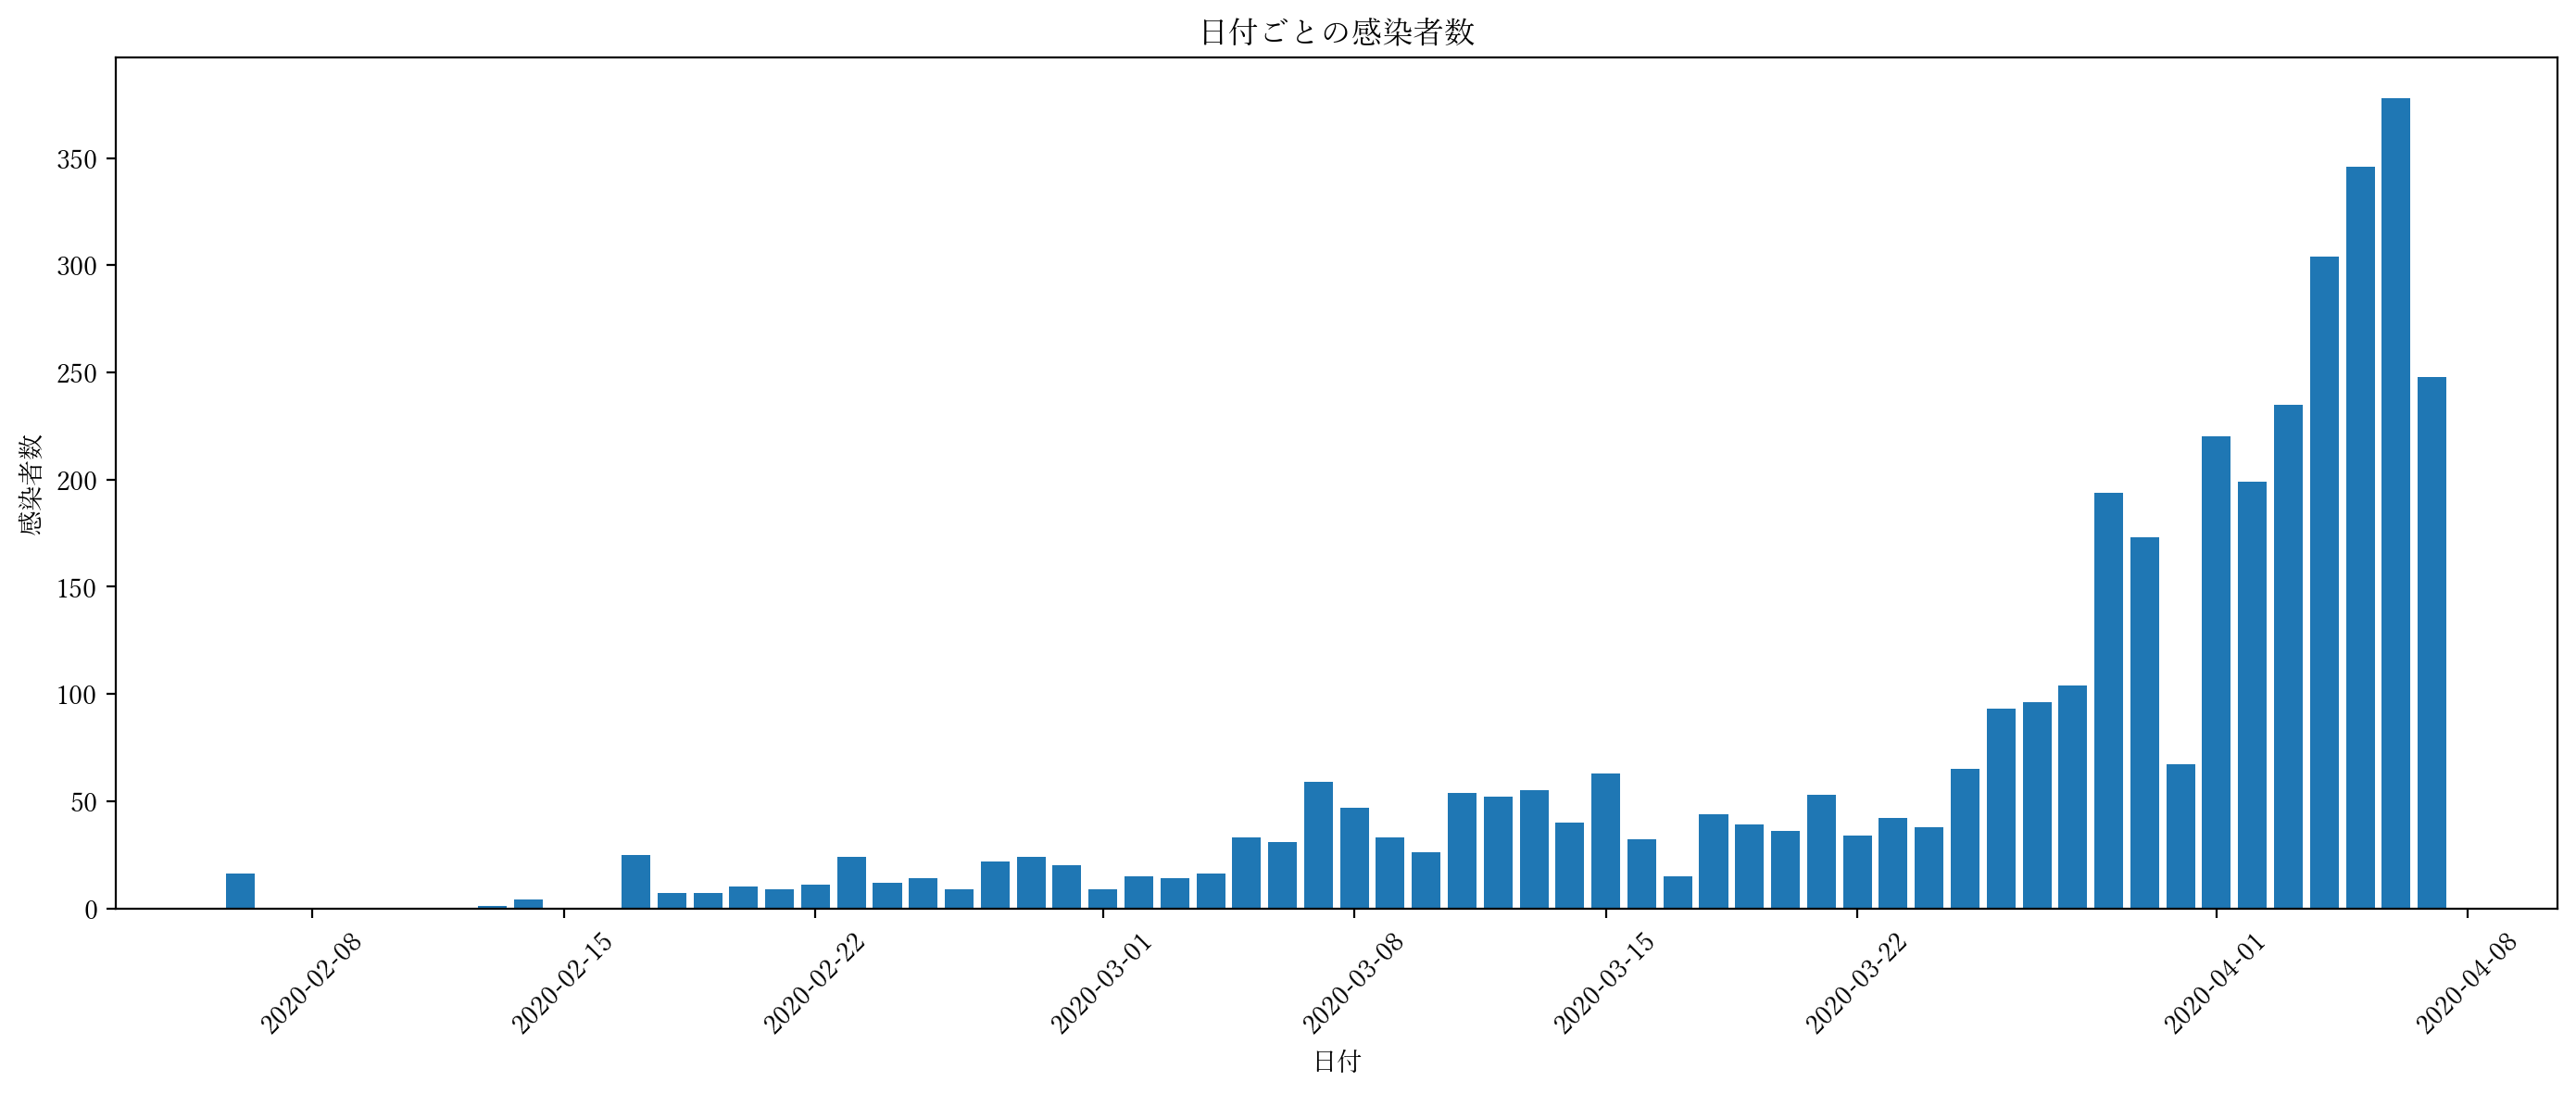

In [44]:
plt.figure(figsize=(14, 6))
plt.bar(df_jpn['Date'], df_jpn['Infected_day'])
plt.xlabel('日付')
plt.ylabel('感染者数')
plt.title('日付ごとの感染者数')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

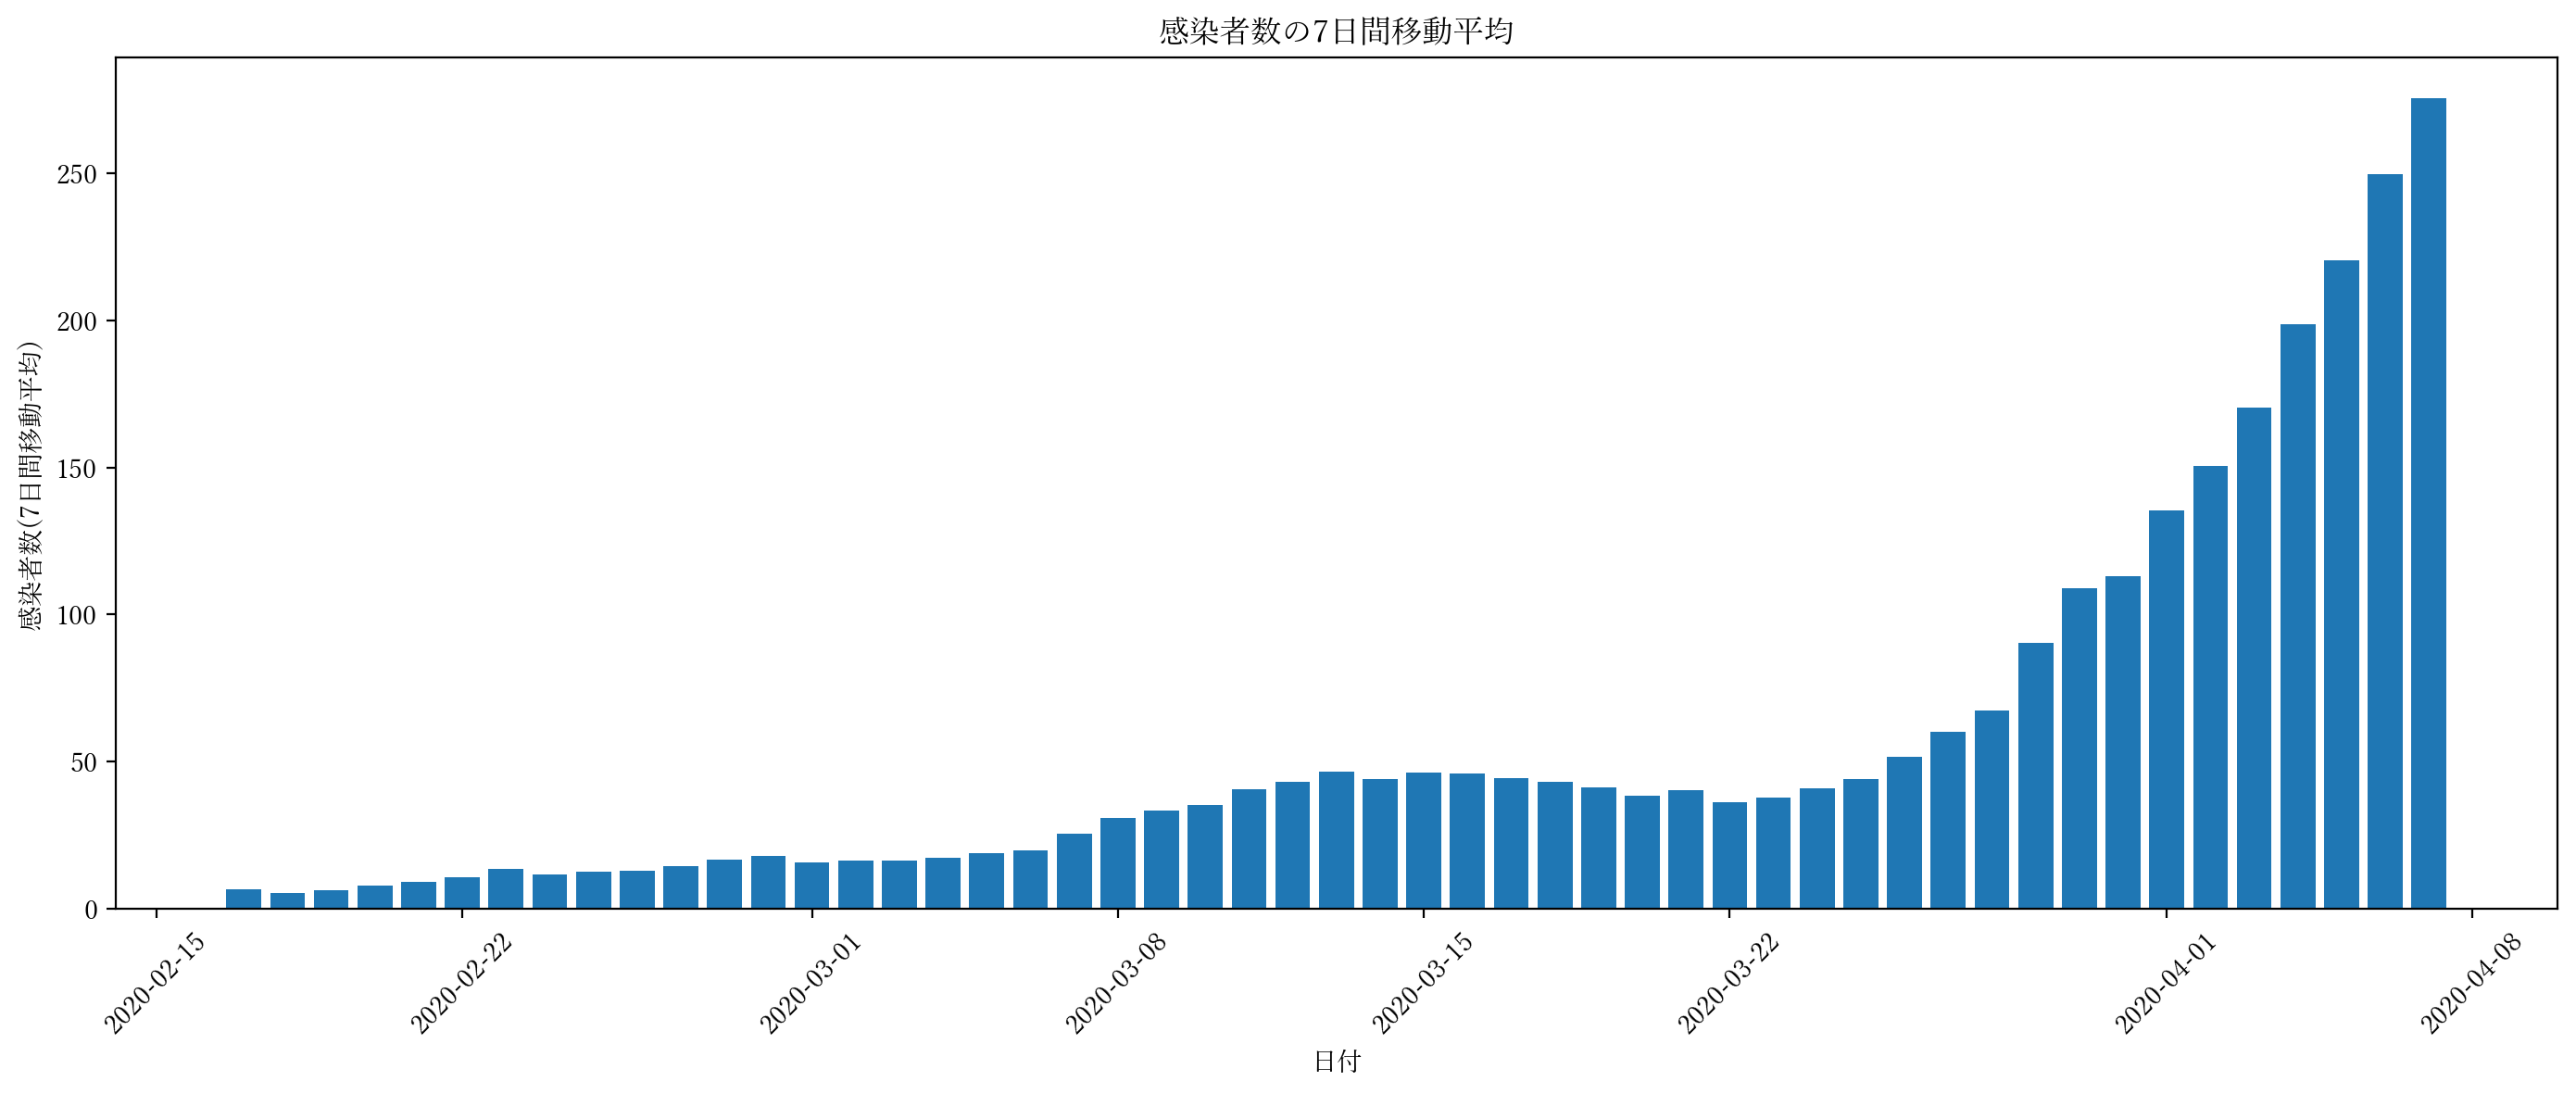

In [45]:
df_jpn['MA_7'] = df_jpn['Infected_day'].rolling(window=7).mean()

plt.figure(figsize=(14, 6))
plt.bar(df_jpn['Date'], df_jpn['MA_7'])
plt.xlabel('日付')
plt.ylabel('感染者数(7日間移動平均)')
plt.title('感染者数の7日間移動平均')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

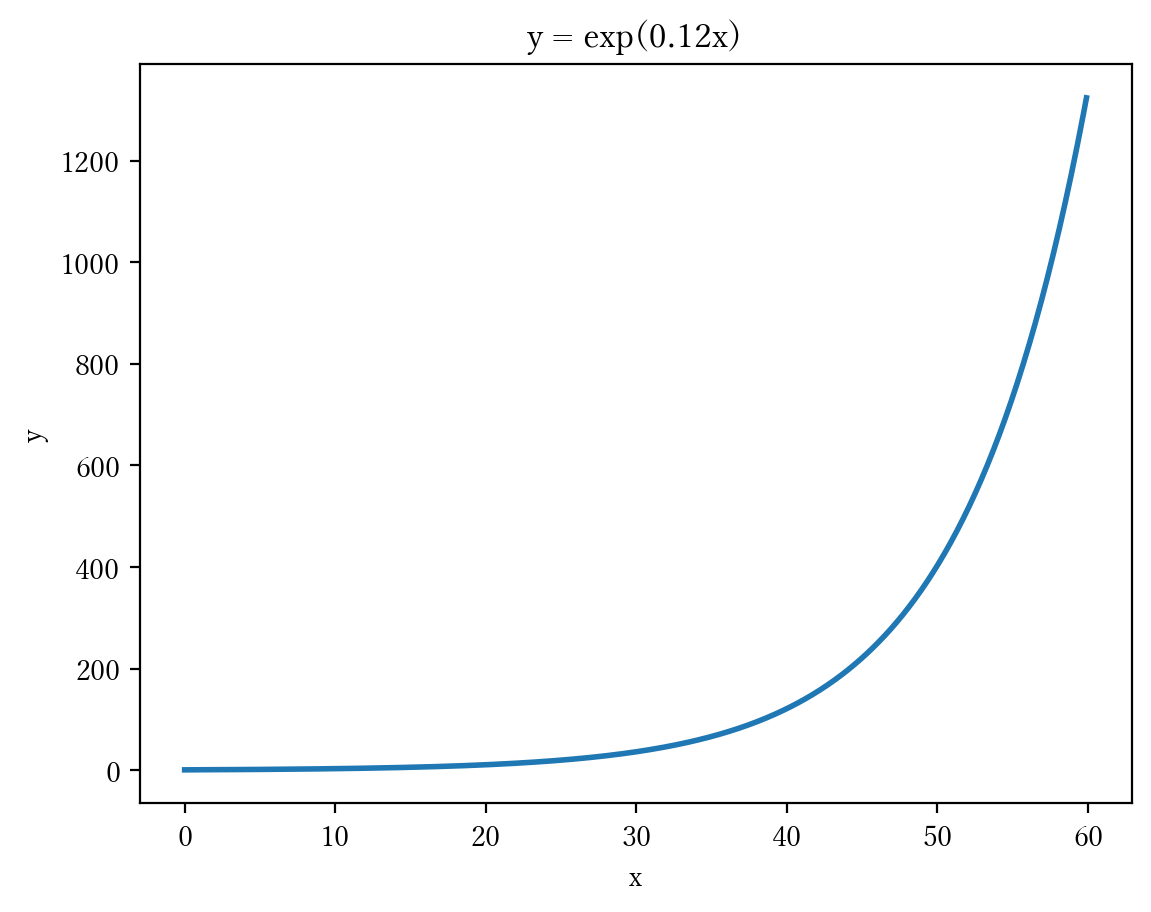

In [46]:
a = 0.12
x = np.arange(0, 60, 0.1)
y = np.exp(a * x)

plt.plot(x, y, linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = exp(0.12x)')
plt.show()